In [48]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [49]:
(x_train,y_train),(x_test,y_test)= datasets.cifar10.load_data()
x_train.shape

(50000, 32, 32, 3)

In [50]:
x_test.shape

(10000, 32, 32, 3)

In [51]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [52]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [53]:
classes = ["airplane", "automobile","bird", "cat","deer","dog","frog","horse","ship","truck"]

In [54]:
classes[9]

'truck'

In [55]:
def plot_sample(x,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

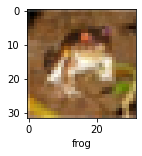

In [56]:
plot_sample(x_train,y_train,0)

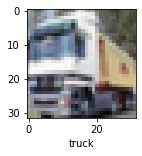

In [57]:
plot_sample(x_train,y_train,1)

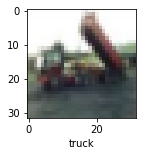

In [58]:
plot_sample(x_train,y_train,2)

In [59]:
# we have to decrese pixel size to normalize the value which range in between 0 to 255

x_train = x_train/255
x_test = x_test/255

In [68]:
from tensorflow import keras

In [73]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation= "relu"),
        layers.Dense(1000, activation= "relu"),
        layers.Dense(10, activation= "sigmoid"),
    ])
ann.compile(optimizer='SGD',
            loss="sparse_categorical_crossentropy",
           metrics= ["accuracy"])
ann.fit(x_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 114s 73ms/step - loss: 1.8602 - accuracy: 0.3350
Epoch 2/5
1563/1563 [==============================] - 122s 78ms/step - loss: 1.6601 - accuracy: 0.4125
Epoch 3/5
1563/1563 [==============================] - 124s 80ms/step - loss: 1.5691 - accuracy: 0.4446
Epoch 4/5
1563/1563 [==============================] - 114s 73ms/step - loss: 1.5083 - accuracy: 0.4684
Epoch 5/5
1563/1563 [==============================] - 115s 74ms/step - loss: 1.4563 - accuracy: 0.4879


In [74]:
ann.evaluate(x_test,y_test)

313/313 [==============================] - 6s 19ms/step - loss: 1.6439 - accuracy: 0.4190


[1.643934965133667, 0.4189999997615814]

In [75]:
cnn = models.Sequential([
        # cnn
        layers.Conv2D(filters=32,kernel_size=(3,3), activation="relu",input_shape=(32,32,3)),
        layers.MaxPooling2D((2,2)),
    
        layers.Conv2D(filters=64,kernel_size=(3,3), activation="relu"),
        layers.MaxPooling2D((2,2)),
        # Dense
        layers.Flatten(),
        layers.Dense(64, activation= "relu"),
        layers.Dense(10, activation= "softmax"),
    ])

In [76]:
cnn.compile(optimizer='adam',
            loss="sparse_categorical_crossentropy",
           metrics= ["accuracy"])

In [77]:
cnn.fit(x_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 52s 33ms/step - loss: 1.4692 - accuracy: 0.4741
Epoch 2/10
1563/1563 [==============================] - 52s 34ms/step - loss: 1.1089 - accuracy: 0.6108
Epoch 3/10
1563/1563 [==============================] - 52s 33ms/step - loss: 0.9761 - accuracy: 0.6596
Epoch 4/10
1563/1563 [==============================] - 52s 33ms/step - loss: 0.8972 - accuracy: 0.6882
Epoch 5/10
1563/1563 [==============================] - 51s 33ms/step - loss: 0.8354 - accuracy: 0.7087
Epoch 6/10
1563/1563 [==============================] - 52s 34ms/step - loss: 0.7889 - accuracy: 0.7274
Epoch 7/10
1563/1563 [==============================] - 52s 33ms/step - loss: 0.7375 - accuracy: 0.7467
Epoch 8/10
1563/1563 [==============================] - 53s 34ms/step - loss: 0.6956 - accuracy: 0.7593
Epoch 9/10
1563/1563 [==============================] - 53s 34ms/step - loss: 0.6611 - accuracy: 0.7693
Epoch 10/10
1563/1563 [==============================] - 53s 34m

In [78]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.8705 - accuracy: 0.7090


[0.8705205917358398, 0.7089999914169312]

In [79]:
y_test= y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

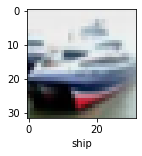

In [80]:
plot_sample(x_test,y_test,1)

In [82]:
y_pred= cnn.predict(x_test)
y_pred[:5]

array([[6.4553493e-03, 1.9022126e-03, 6.7278123e-03, 7.3148000e-01,
        1.0227457e-03, 1.2142675e-01, 8.4467933e-02, 3.4929218e-04,
        4.0585760e-02, 5.5821659e-03],
       [7.6314685e-04, 4.8408925e-04, 5.1754705e-07, 1.7960950e-07,
        1.3225999e-08, 3.3142294e-10, 6.6090995e-09, 9.7580033e-10,
        9.9858522e-01, 1.6688215e-04],
       [3.6991617e-01, 2.6068416e-01, 1.3181031e-02, 3.2560479e-02,
        3.7142560e-03, 1.1144027e-03, 3.8720954e-03, 5.7729823e-03,
        2.8837106e-01, 2.0813402e-02],
       [9.4772846e-01, 3.2828874e-03, 2.2395493e-03, 4.6477371e-04,
        1.7043768e-03, 1.8124492e-05, 8.1484141e-05, 2.4445067e-04,
        4.3107752e-02, 1.1281401e-03],
       [6.4884621e-06, 1.1220956e-04, 2.7804492e-02, 4.3021146e-02,
        2.2094576e-01, 3.4142185e-03, 7.0462334e-01, 4.6943667e-05,
        2.2440607e-05, 2.9312271e-06]], dtype=float32)

In [83]:
y_classes= [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 0, 0, 6]

In [84]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

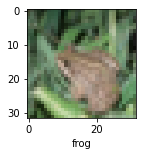

In [91]:
plot_sample(x_test,y_test,4)

In [92]:
classes[y_classes[4]]

'frog'

In [99]:
from sklearn.metrics import classification_report

In [100]:
print("Classification report: \n", classification_report(y_test,y_classes))

Classification report: 
               precision    recall  f1-score   support

           0       0.77      0.72      0.75      1000
           1       0.82      0.84      0.83      1000
           2       0.70      0.48      0.57      1000
           3       0.48      0.60      0.53      1000
           4       0.64      0.69      0.66      1000
           5       0.66      0.59      0.62      1000
           6       0.77      0.77      0.77      1000
           7       0.73      0.76      0.75      1000
           8       0.80      0.82      0.81      1000
           9       0.77      0.80      0.79      1000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.71     10000
weighted avg       0.71      0.71      0.71     10000

